In [20]:
from matplotlib.image import imread # Reading image
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # Creating 3d plots
import os


In [21]:
def plotinho(image_gray):
  plt.rcParams['figure.figsize'] = [5,5]
  plt.rcParams.update({'font.size': 18})

  Bt = np.fft.fft2(image_gray)
  Btsort = np.sort(np.abs(Bt.reshape(-1)))

  for keep in (0.9,0.5,0.2,0.01,0.001):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh
    Atlow = Bt * ind
    Alow = np.fft.ifft2(Atlow).real
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100)+'%')
  return ind

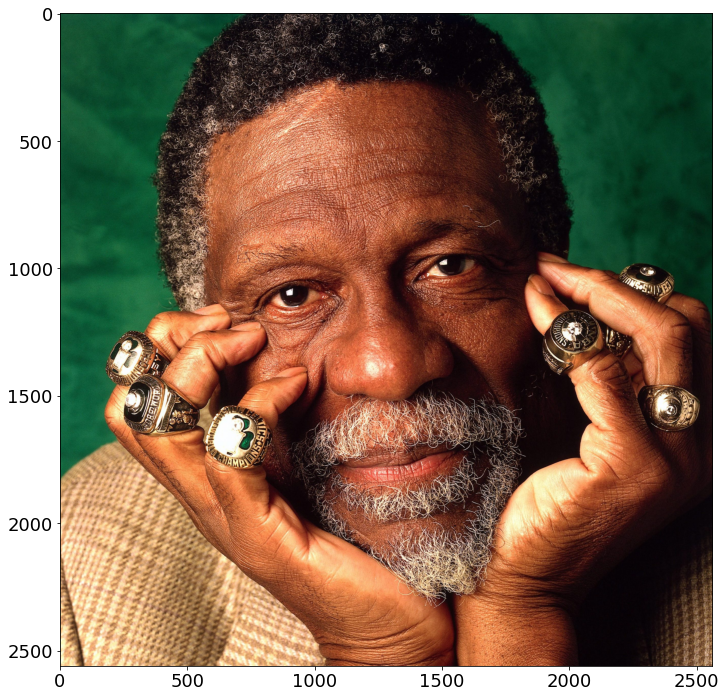

In [22]:
image = imread('Bill_Russel.jpg')
image_gray = np.mean(image, -1)
plt.figure()
plt.imshow(image)

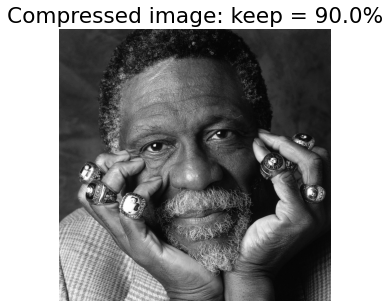

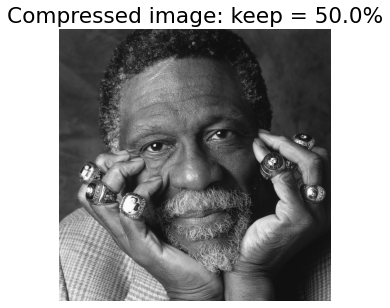

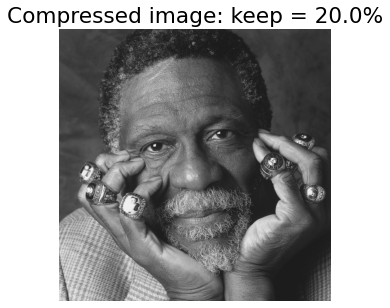

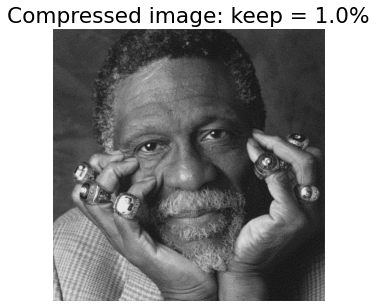

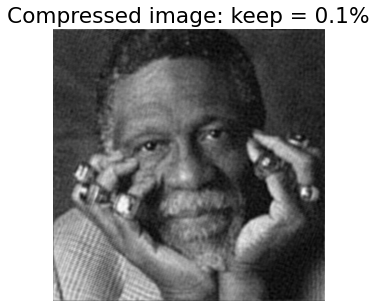

In [23]:
ind = plotinho(image_gray)

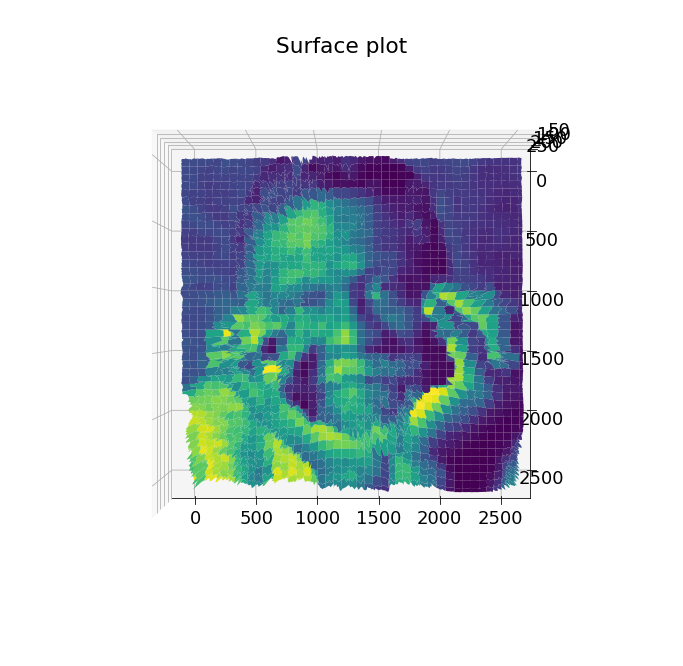

In [24]:
plt.rcParams['figure.figsize'] = [12,12]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(np.arange(1,np.shape(image_gray)[1]+1),np.arange(1,np.shape(image_gray)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],image_gray[0::10,0::10],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(-90,-90)
plt.show()